# **Exploratory Data Analysis**
Exploratory data analysis (EDA) is a crucial component of data science which allows you to develop the gist of what your data look like and what kinds of questions might be answered by them.
Ultimately, EDA is important because it allows the investigator to make critical decisions about what is interesting to pursue and what probably isn’t worth following up on and thus building a hypothesis using the relationships between variables.

# **Context of Data**
In this notebook I will use a SampleSuperstore dataset. It contains information about products, sales, profits, and so on that can use to identify key areas for improvement within this fictitious company.

### Author : Ishardina Cholifatul Hidayati

In [ ]:
# import all libaries requires in this notebook
import pandas as pd
import numpy as np
import seaborn as sns

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# load the dataset and create their dataframes
path = "/content/SampleSuperstore.csv"
df = pd.read_csv(path)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## **#1 Data Cleansing Process**
Data cleansing is the first and a very crucial step in the overall data preparation process and is the process of analysing, identifying and correcting messy, raw data. 

In [ ]:
#column name of table
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
#check data type of attributes
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

### a. We need to remove unused columns
It is always easier to make your decisions from the data which is actually relevant and concise.

In [ ]:
#Check the unique attributes in this dataset
for i in df.columns:
  x = df[i].nunique()
  print(i, x)

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


In [ ]:
# check the 'Country' in this datasets
df['Country'].unique()

array(['United States'], dtype=object)

Clearly the data is for US country only, so we can drop the 'Country' column as we dont need any analysis to be done based on it.

In [ ]:
df = df.drop('Country', axis=1)
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### b. Removing the duplicacy in the rows (if any):

In [ ]:
# dropping the duplicates from datasets
print('Before drop duplicates =', df.shape)
df = df.drop_duplicates(keep='first')
print('After drop duplicates = ', df.shape)

Before drop duplicates = (9994, 12)
After drop duplicates =  (9977, 12)


Clearly there are 17 duplicates data.

### c. Check the null-value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   City          9977 non-null   object 
 3   State         9977 non-null   object 
 4   Postal Code   9977 non-null   int64  
 5   Region        9977 non-null   object 
 6   Category      9977 non-null   object 
 7   Sub-Category  9977 non-null   object 
 8   Sales         9977 non-null   float64
 9   Quantity      9977 non-null   int64  
 10  Discount      9977 non-null   float64
 11  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1013.3+ KB


there is no missing data in this dataset. So, after cleansing, this is what the data looks like :

In [ ]:
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## **#2 Identifying relationships between variables / features**
The main goal here is to identify and create relationships which can help you to build a hypothesis. We can analyse the data further in 2 different ways.

*   Product Level Analysis
*   Costumer Level Analysis

We’ll have to define questions which can help us build some relationships to look at. At this point, I came up with the following questions when I studied this dataset.

### a. Which categories give the bigest profit? 

In [ ]:
profit_per_category = df.groupby('Category')['Profit'].agg('sum')
pd.DataFrame(profit_per_category)

,Profit
Category,
Furniture,18421.8137
Office Supplies,122364.6608
Technology,145454.9481


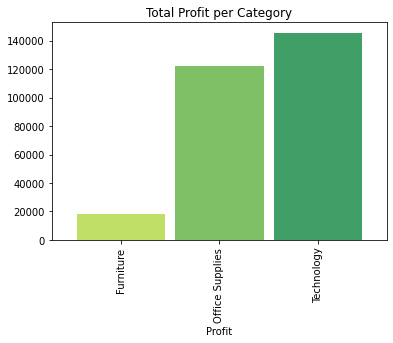

In [ ]:
profit_per_category.plot.bar(
    width=0.9,
    color=sns.color_palette('summer_r',3)
)
plt.title('Total Profit per Category')
plt.xlabel('Profit')
plt.show()

The highest profit is obtained by Technology. The second place is the office supplies with a difference of about 2000, while the last order is furniture with a significant difference from the profits obtained by the office supplies and technology category.

### b. Which 5 sub-categories product are most bought? 

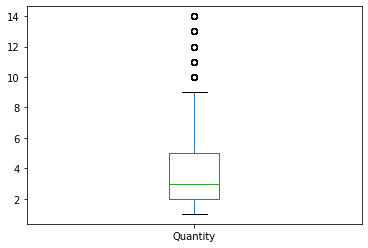

In [ ]:
df[['Quantity']].plot.box()

In [ ]:
quantity_per_subcategory = df.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False)
pd.DataFrame(quantity_per_subcategory).head(5)

,Quantity
Sub-Category,
Binders,5971
Paper,5144
Furnishings,3560
Phones,3289
Storage,3158


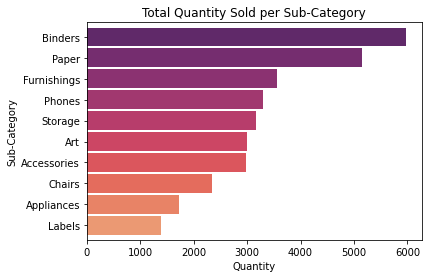

In [ ]:
quantity_per_subcategory.head(10).sort_values(ascending=True).plot.barh(
    width=0.9,
    color=sns.color_palette('flare',10)
)
plt.title('Total Quantity Sold per Sub-Category')
plt.xlabel('Quantity')
plt.show()

The sub-category of products that sold the most was Binders, Paper, Furnishings, Phones, and Storage.

### c. Does the discount affect the quantity purchased or the profit earned?

In [ ]:
corr = df[['Quantity','Discount', 'Profit']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Quantity,Discount,Profit
Quantity,1.00,0.01,0.07
Discount,0.01,1.00,-0.22
Profit,0.07,-0.22,1.00


When viewed from the correlation table, discounts have no effect on the number of product purchases, while in this case discounts do not really have an effect on profits. So, let's check the profit more detail.

In [ ]:
df[['Discount','Profit']].describe()

,Discount,Profit
count,9977.000000,9977.00000
mean,0.156278,28.69013
std,0.206455,234.45784
min,0.000000,-6599.97800
25%,0.000000,1.72620
50%,0.200000,8.67100
75%,0.200000,29.37200
max,0.800000,8399.97600


As mentioned in the description dataset, some profit is negative. So, let's look what produk give a loss. 

In [ ]:
#get negative profit
negative_profit = df[df['Profit']<0]
negative_profit.sort_values(by='Profit', ascending=True).head(10)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0.7,-6599.9780
683,Same Day,Corporate,Burlington,North Carolina,27217,South,Technology,Machines,7999.980,4,0.5,-3839.9904
9774,Standard Class,Consumer,San Antonio,Texas,78207,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928
3011,Standard Class,Home Office,Louisville,Colorado,80027,West,Technology,Machines,2549.985,5,0.7,-3399.9800
4991,Standard Class,Corporate,Chicago,Illinois,60653,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845
3151,First Class,Consumer,Newark,Ohio,43055,East,Technology,Machines,1799.994,2,0.7,-2639.9912
5310,First Class,Consumer,Houston,Texas,77095,Central,Office Supplies,Binders,1525.188,6,0.8,-2287.7820
9639,Second Class,Consumer,Concord,North Carolina,28027,South,Furniture,Tables,4297.644,13,0.4,-1862.3124
1199,Standard Class,Consumer,Houston,Texas,77041,Central,Office Supplies,Binders,1088.792,4,0.8,-1850.9464
2697,Standard Class,Home Office,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784


In [ ]:
negative_profit['Profit'].sum()

-156112.98990000002

In [ ]:
loss_per_category = negative_profit.groupby('Category')['Profit'].agg('sum')
pd.DataFrame(loss_per_category)

,Profit
Category,
Furniture,-60924.0502
Office Supplies,-56609.0215
Technology,-38579.9182


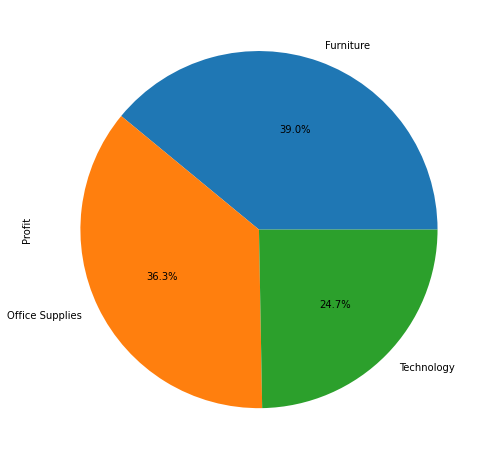

In [ ]:
loss_per_category = pd.DataFrame(negative_profit.groupby('Category')['Profit'].agg('sum'))
plt.figure(figsize=(8,9))
np.absolute(loss_per_category['Profit']).plot.pie(autopct="%1.1f%%")

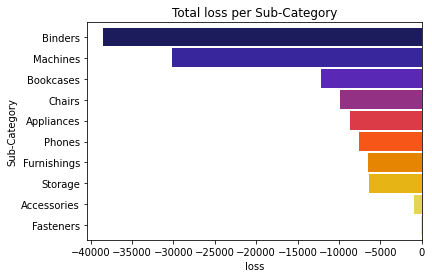

In [ ]:
loss_per_subcategory = negative_profit.groupby('Sub-Category')['Profit'].agg('sum')
pd.DataFrame(loss_per_subcategory)
loss_per_subcategory.head(10).sort_values(ascending=False).plot.barh(
    width=0.9,
    color=sns.color_palette('CMRmap_r',10)
)
plt.title('Total loss per Sub-Category')
plt.xlabel('loss')
plt.show()

The total loss obtained was 156112.98 with the largest contributor to the loss was furniture, which was 39% of the total loss. Meanwhile, the product that contributed the largest loss was binders with a loss of nearly 40000.

### d. Which consumer segment spend the most money?


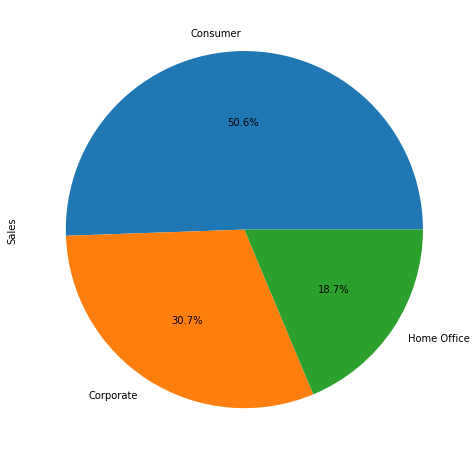

In [ ]:
sales_per_segment = pd.DataFrame(df[['Segment', 'Sales']].groupby('Segment')['Sales'].agg('sum'))
plt.figure(figsize=(8,9))
sales_per_segment['Sales'].plot.pie(autopct="%1.1f%%")

'consumer' segment spend the most on their purchases. Which was more than 50% from total sales.

### e. Which 5 states order the most?

In [ ]:
state= df[['State']].value_counts()
state.head()

State       
California      1996
New York        1127
Texas            983
Pennsylvania     586
Washington       502
dtype: int64

Customer from California the most frequently order. The next state are New York, Texas, Pennsylvania, and Washington.  

### f. Which region gives the most profit?

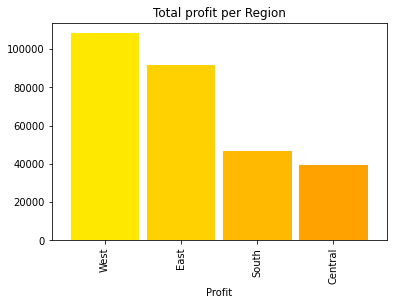

In [ ]:
profit_per_region = df.groupby('Region')['Profit'].agg('sum')
pd.DataFrame(profit_per_region)
profit_per_region.head(10).sort_values(ascending=False).plot.bar(
    width=0.9,
    color=sns.color_palette('autumn_r',10)
)
plt.title('Total profit per Region')
plt.xlabel('Profit')
plt.show()

Customer from west US region gives the most profit from product they bought. 

## **#3 Conclusion**


1.   The Category gives the highest profit is obtained by Technology. The second place is the office supplies and the last order is furniture.
2.   The sub-category of products that sold the most was Binders, Paper, Furnishings, Phones, and Storage.
3.   In this case, discounts have no effect on the number of product purchases, while discounts also do not really have an effect on profits. 
4.   The total loss obtained was 156112.98 with the largest contributor to the loss was furniture, which was 39% of the total loss. Meanwhile, the product that contributed the largest loss was binders with a loss of nearly 40000.
5.   'Consumer' segment spend the most on their purchases, which was more than 50% from total sales.
6.  Customer from California the most frequently order. The next state are New York, Texas, Pennsylvania, and Washington. 
7.  West US region gives the most profit from product they bought. 

# #4 Suggestion
Superstore should focus on increasing sales in the technology category because in addition to providing the least loss it also provides the greatest profit.